In [1]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image
import json
import sys
import os
from os import walk
from collections import defaultdict
path = './output_slurm/'
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [13]:

# for (dirpath, dirnames, filenames) in walk(mypath):

def find(A, x):
    out = filter(lambda y: x in y, A)
    if len(out)>0: return out[0]
    return [];
def getVal(xStr, token=":"):
    a = xStr.split(token);
    b = a[1]
    if '\n' in b:
        spl = b.split("\n");
        return float(spl[0]);
    return float(b);
def get_size_param(x):
    x = x.replace('\n','')
    x = x.split("(")[-1].split(")")[0];
    y = x.split(",")
    a = find(y, 'hidden_size');
    b = find(y, 'num_layer');
    c = find(y, 'embed_size')
    hidden_size = int(getVal(a,token='='))
    num_layer = int(getVal(b,token='='))
    embed_size = int(getVal(c,token='='))
    return hidden_size, embed_size, num_layer
def plot(log):   
    #     for fn in filenames:
    idx2Arg2Loss = defaultdict(dict);
    i = 0;
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    pltlog = []
    with (open(log, 'r')) as handle:
        for line in handle:
    #         print line
            if ('Namespace' in line):
                #first line
                i+=1;
                idx2Arg2Loss[i] = {'arg':'','loss':[],'time':[]};
            if ('embed_size' in line) or ('hidden_size' in line) or ('num_layer' in line):
                idx2Arg2Loss[i]['arg'] += line
            elif ('Epoch' in line):
                spl = line.split(",");
                lossStr = find(spl, 'Loss');
                timeStr = find(spl, 'Time');
                loss = getVal(lossStr)
                time = getVal(timeStr)
                idx2Arg2Loss[i]['loss'].append(loss);
                idx2Arg2Loss[i]['time'].append(time);

        for k, v in idx2Arg2Loss.iteritems():
            print v
            a,b,c = get_size_param(v['arg'])
            print a,b,c
            pltlog.append('%d-%d-%d'%(a,b,c));
            print 'TIME: ', v['time'][-1]
            print '----------'
            plt.plot(v['loss'])
        plt.legend(pltlog, loc='upper left')
        plt.show()

            

./output_slurm/1-2_layer_lstm.txt
{'loss': [9.2085, 3.9913, 3.2988, 3.2699, 2.8718, 3.1382, 2.7731, 2.7808, 2.6692, 2.4869, 2.6884, 2.8495, 2.6341, 2.3282, 2.2652], 'time': [0.7754, 103.0126, 209.6315, 210.1415, 312.9199, 415.5985, 416.1266, 518.7435, 621.2833, 621.7791, 724.1334, 826.0232, 826.6011, 928.9089, 1031.5019], 'arg': "Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=128, hidden_size=256, image_dir='./data/resized2014', learning_rate=0.005, log_step=500, model_path='./models/', num_epochs=5, num_layers=2, num_workers=2, save_step=500, vocab_path='./data/vocab.pkl')\n"}
256 128 2
TIME:  1031.5019
----------
{'loss': [9.2089, 3.1415, 2.78, 2.5858, 2.8545, 2.7462, 2.3334, 2.3998, 2.0365, 2.0009, 2.3052, 2.0882, 1.9136, 2.0749, 1.804], 'time': [0.5949, 112.3101, 226.4493, 226.9943, 334.5667, 441.6978, 442.6593, 548.3556, 653.5182, 654.2806, 760.6781, 866.6238, 867.1465, 972.8646, 1078.044], 'arg': "Namespace(batch_s

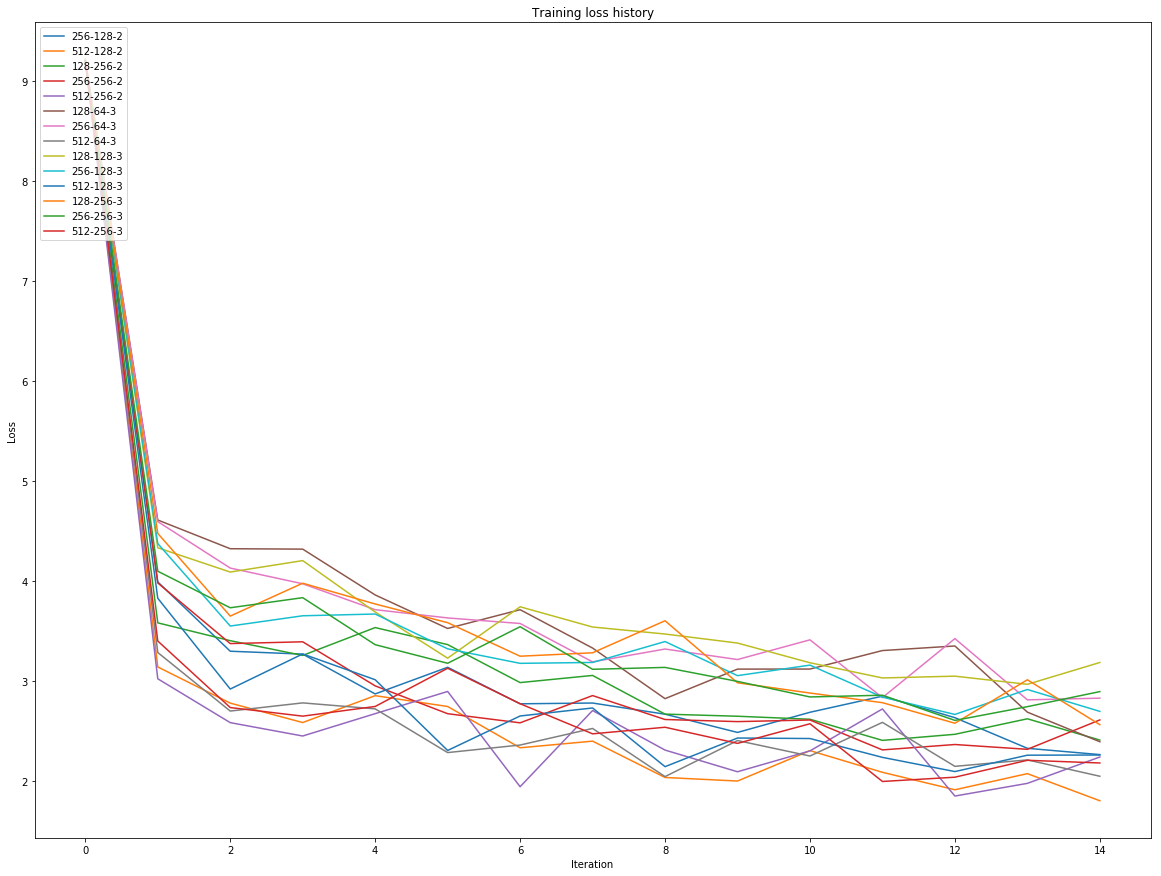

In [14]:
mypath = path + '1-2_layer_lstm.txt'
print mypath
plot(mypath)